For this assignment I have chosen a dataset from Kaggle named Restaurant Business Rankings 2020. Due to the COVID 19 pandemic the restaurant industry has suffered a lot. I am currently working in the food and service industry therefore, I am aware of the adverse effect of the pandemic on this industry.In this analysis Top performing restaurants in the industry have bben identified.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# Data Exploration

As I work in a Chick-Fil-A restaurant in the Orlando,FL area it was a relief to know that Chick-Fil-A is doing well financially.

In [4]:
top_performing_restaurant = pd.read_csv ("C:\\Users\\malia\\OneDrive\\Desktop\\MSDS Data 602\\Top250.csv",index_col=0)
top_performing_restaurant

,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
Rank,,,,,,,,
1,McDonald's,NaN,40412,4.90%,13846,-0.50%,NaN,Quick Service & Burger
2,Starbucks,NaN,21380,8.60%,15049,3.00%,NaN,Quick Service & Coffee Cafe
3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.00%,2470,5.00%,NaN,Quick Service & Chicken
4,Taco Bell,NaN,11293,9.00%,6766,2.70%,NaN,Quick Service & Mexican
5,Burger King,NaN,10204,2.70%,7346,0.20%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...
246,Rainforest Cafe,NaN,129,-10.40%,18,-5.30%,NaN,Varied Menu
247,PDQ,NaN,127,-5.50%,56,-11.10%,NaN,Chicken
248,Lupe Tortilla,NaN,127,12.10%,25,8.70%,NaN,Mexican


In [5]:
top_performing_restaurant.describe()

,Sales,Units
count,250.00000,250.000000
mean,1242.74000,850.076000
std,3365.22882,2296.151659
min,126.00000,13.000000
25%,181.00000,85.000000
50%,330.00000,207.000000
75%,724.75000,555.250000
max,40412.00000,23801.000000


# Data Wrangling

In [6]:
top_performing_restaurant.sort_values(by=['Sales'],ascending=False).head(10)

,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
Rank,,,,,,,,
1,McDonald's,NaN,40412,4.90%,13846,-0.50%,NaN,Quick Service & Burger
2,Starbucks,NaN,21380,8.60%,15049,3.00%,NaN,Quick Service & Coffee Cafe
3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.00%,2470,5.00%,NaN,Quick Service & Chicken
4,Taco Bell,NaN,11293,9.00%,6766,2.70%,NaN,Quick Service & Mexican
5,Burger King,NaN,10204,2.70%,7346,0.20%,NaN,Quick Service & Burger
6,Subway,NaN,10200,-2.00%,23801,-4.00%,NaN,Quick Service & Sandwich
7,Wendy's,NaN,9762,4.20%,5852,0.70%,NaN,Quick Service & Burger
8,Dunkin',"Dunkin' dropped ""Donuts"" from its name and rep...",9228,5.00%,9630,2.20%,NaN,Quick Service & Coffee Cafe
9,Domino's,NaN,7044,6.90%,6126,4.30%,NaN,Quick Service & Pizza


In [7]:
top_performing_restaurant.isna().sum()

Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

As content and Headquarter has too many NA values they needed to be dropped.

In [10]:
top_performing_restaurant = top_performing_restaurant.drop(['Content','Headquarters'],axis=1)
top_performing_restaurant.head(10)

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category
Rank,,,,,,
1,McDonald's,40412,4.90%,13846,-0.50%,Quick Service & Burger
2,Starbucks,21380,8.60%,15049,3.00%,Quick Service & Coffee Cafe
3,Chick-fil-A,11320,13.00%,2470,5.00%,Quick Service & Chicken
4,Taco Bell,11293,9.00%,6766,2.70%,Quick Service & Mexican
5,Burger King,10204,2.70%,7346,0.20%,Quick Service & Burger
6,Subway,10200,-2.00%,23801,-4.00%,Quick Service & Sandwich
7,Wendy's,9762,4.20%,5852,0.70%,Quick Service & Burger
8,Dunkin',9228,5.00%,9630,2.20%,Quick Service & Coffee Cafe
9,Domino's,7044,6.90%,6126,4.30%,Quick Service & Pizza


In [11]:
top_performing_restaurant['Segment_Category'].value_counts()

Varied Menu                        22
Mexican                            14
Quick Service & Burger             13
Burger                             10
Italian/Pizza                      10
Family Style                       10
Casual Dining & Varied Menu         9
Pizza                               9
Steak                               9
Quick Service & Pizza               8
Seafood                             8
Bakery Cafe                         8
BBQ                                 7
Sandwich                            7
Chicken                             7
Family Dining & Family Style        7
Sports Bar                          6
Quick Service & Chicken             6
Fast Casual & Sandwich              6
Quick Service & Coffee Cafe         4
Frozen Desserts                     4
Snack                               4
Casual Dining & Steak               4
Fast Casual & Burger                4
Family Casual                       4
Coffee Cafe                         4
Fast Casual 

menu column has been added which is created from the segment_category by extracting what type of cuisine or menu items these restaurants from the dataset offer.

In [12]:
def remove_theme(col):
    no_theme = col.split(" ")
    if no_theme[-1]=='Cafe':
        menu = no_theme[-2]
    else:
        menu = no_theme[-1]
    return menu
top_performing_restaurant['Menu'] = top_performing_restaurant['Segment_Category'].apply(remove_theme)

In [13]:
top_performing_restaurant.head(10)

,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Menu
Rank,,,,,,,
1,McDonald's,40412,4.90%,13846,-0.50%,Quick Service & Burger,Burger
2,Starbucks,21380,8.60%,15049,3.00%,Quick Service & Coffee Cafe,Coffee
3,Chick-fil-A,11320,13.00%,2470,5.00%,Quick Service & Chicken,Chicken
4,Taco Bell,11293,9.00%,6766,2.70%,Quick Service & Mexican,Mexican
5,Burger King,10204,2.70%,7346,0.20%,Quick Service & Burger,Burger
6,Subway,10200,-2.00%,23801,-4.00%,Quick Service & Sandwich,Sandwich
7,Wendy's,9762,4.20%,5852,0.70%,Quick Service & Burger,Burger
8,Dunkin',9228,5.00%,9630,2.20%,Quick Service & Coffee Cafe,Coffee
9,Domino's,7044,6.90%,6126,4.30%,Quick Service & Pizza,Pizza


# Data Visualization

Analyzing the top menu items from the menu.

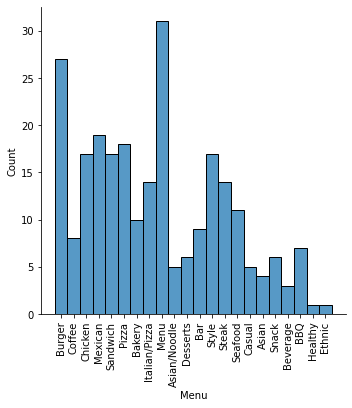

In [14]:
g = sns.displot(top_performing_restaurant,x=top_performing_restaurant['Menu'])
g.set_xticklabels(rotation=90)